#### 네이버 증권 데이터 가져오기

In [3]:
#!pip install mplfinance

In [32]:
import pandas as pd
from bs4 import BeautifulSoup as bs
from selenium import webdriver
import requests
import time

import warnings
warnings.filterwarnings('ignore')

In [34]:
# requests를 이용한 데이터 요청(오류 데이터 전송)
html=requests.get('https://finance.naver.com/item/sise_day.naver?code=035720&page=1')
#bs(html.text,'html.parser')

In [60]:
page=1
code=input('코드 입력:')  #'035720'
url=f'https://finance.naver.com/item/sise_day.naver?code={code}&page='

driver=webdriver.Chrome('./chromedriver.exe')
time.sleep(0.5)
driver.get(url + str(page))
time.sleep(0.5)
soup = bs(driver.page_source, 'html.parser')

# tmp=soup.select('tbody tr td.pgRR a')
# endPage=tmp[0]['href'].split('=')[-1]
endPage=soup.select('tbody tr td.pgRR a')[0]['href'].split('=')[-1]
print(endPage)
nav_stock=[]
# endPage=10

for page in range(1, int(endPage)+1):
    driver.get(url + str(page))
    soup = bs(driver.page_source, 'html.parser')
    soup_trs = soup.select('tr')
    
    for tr in soup_trs:
        # 일자별 데이터 가져오기
        day_data=[]
        soup_tds=tr.select('td')
        if len(soup_tds) == 7:
            for td in soup_tds:
                day_data.append(td.text.replace('\n','').replace('\t',''))
              # day_data.append(re('[가-힣0-9a-zA-Z]+',td.text))
        nav_stock.append(day_data) 
        
driver.close()

코드 입력:035720
570


In [61]:
df=pd.DataFrame(nav_stock, columns=['날짜', '종가', '전일비', '시가', '고가', '저가', '거래량'])

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9690 entries, 0 to 9689
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      5700 non-null   object
 1   종가      5700 non-null   object
 2   전일비     5700 non-null   object
 3   시가      5700 non-null   object
 4   고가      5700 non-null   object
 5   저가      5700 non-null   object
 6   거래량     5700 non-null   object
dtypes: object(7)
memory usage: 530.0+ KB


In [63]:
# NaN 값 제거
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5700 entries, 2 to 9687
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      5700 non-null   object
 1   종가      5700 non-null   object
 2   전일비     5700 non-null   object
 3   시가      5700 non-null   object
 4   고가      5700 non-null   object
 5   저가      5700 non-null   object
 6   거래량     5700 non-null   object
dtypes: object(7)
memory usage: 356.2+ KB


In [65]:
df.head(20)

,날짜,종가,전일비,시가,고가,저가,거래량
2,2023.01.26,"63,500",900,"62,800","63,700","61,700","1,308,442"
3,2023.01.25,"62,600",0,0,0,0,"2,018,473"
4,2023.01.20,"61,200",400,"60,500","61,900","60,500","1,376,217"
5,2023.01.19,"60,800",800,"61,100","61,400","60,200","1,687,361"
6,2023.01.18,"61,600",200,"61,500","62,500","61,100","1,650,067"
10,2023.01.17,"61,800","2,700","64,500","64,500","61,400","3,194,397"
11,2023.01.16,"64,500","2,500","62,300","65,000","62,000","2,989,321"
12,2023.01.13,"62,000",500,"62,100","63,000","61,500","2,248,562"
13,2023.01.12,"61,500",400,"63,000","63,400","61,100","2,197,974"
14,2023.01.11,"61,900","1,200","61,700","62,500","60,800","2,544,430"


#### 증권 차트 출력

In [79]:
import mplfinance as mpf

df_mpf=df[:30].copy()
del df_mpf['전일비']
df_mpf.columns=['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
df_mpf=df_mpf.reset_index(drop=True)
df_mpf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    30 non-null     object
 1   Open    30 non-null     object
 2   High    30 non-null     object
 3   Low     30 non-null     object
 4   Close   30 non-null     object
 5   Volume  30 non-null     object
dtypes: object(6)
memory usage: 1.5+ KB


In [80]:
# columns에 있는 ',' 제거
for cn in df_mpf.columns:
    df_mpf[cn]=df_mpf[cn].str.replace(',',"")

# 데이터 타입 변경
df_mpf['Date']=pd.to_datetime(df_mpf['Date']) # 날자형식의 문자형 => 날짜형 데이터
df_mpf=df_mpf.astype({'Open':int, 'High':int,'Low':int,'Close':int,'Volume':int})
df_mpf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    30 non-null     datetime64[ns]
 1   Open    30 non-null     int32         
 2   High    30 non-null     int32         
 3   Low     30 non-null     int32         
 4   Close   30 non-null     int32         
 5   Volume  30 non-null     int32         
dtypes: datetime64[ns](1), int32(5)
memory usage: 968.0 bytes


In [83]:
df_mpf=df_mpf.sort_values('Date')
df_mpf.index=df_mpf['Date']
df_mpf=df_mpf[['Open', 'High', 'Low', 'Close', 'Volume']]

df_mpf

,Open,High,Low,Close,Volume
Date,,,,,
2022-12-13,58200,59000,59700,57700,1532110
2022-12-14,58700,58800,59500,58300,1550967
2022-12-15,55300,57900,58000,55300,3034680
2022-12-16,54400,53500,54900,53100,2477820
2022-12-19,55800,53900,56400,53900,1364858
2022-12-20,54300,55300,55700,53900,1390754
2022-12-21,54200,54900,55200,53700,980179
2022-12-22,55100,55000,55700,54100,1228266
2022-12-23,53400,54000,54300,53100,1339673


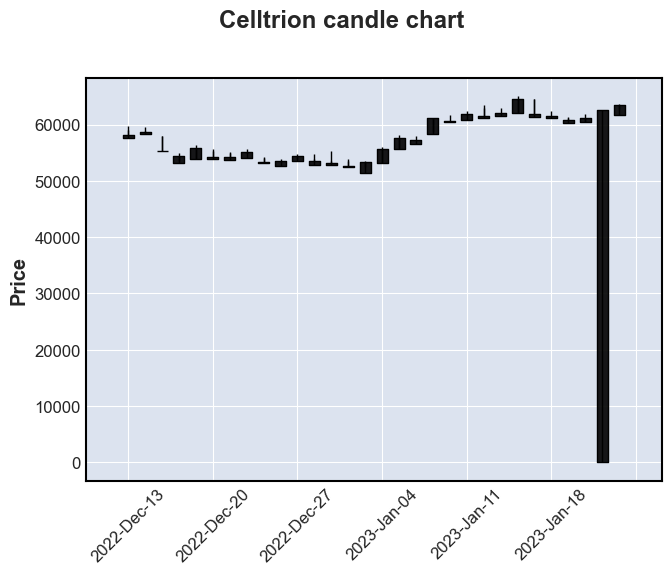

In [84]:
mpf.plot(df_mpf, title='Celltrion candle chart', type='candle')

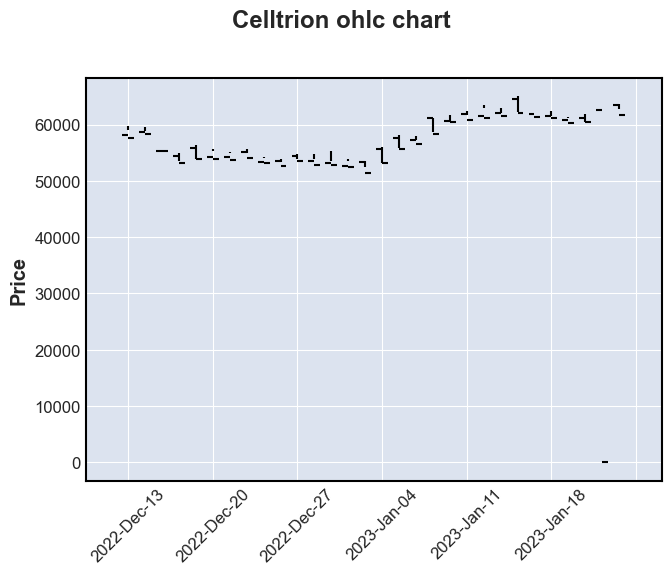

In [85]:
mpf.plot(df_mpf, title='Celltrion ohlc chart', type='ohlc')

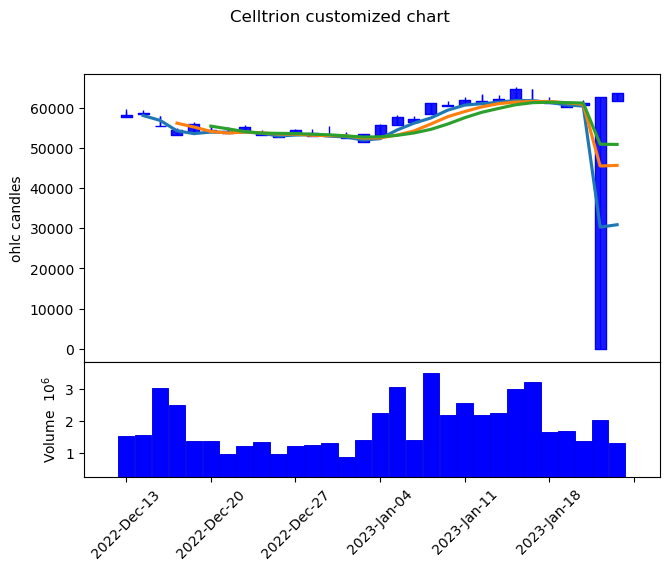

In [86]:
kwargs = dict(title='Celltrion customized chart', type='candle',
              mav=(2, 4, 6), volume=True, ylabel='ohlc candles')

mc = mpf.make_marketcolors(up='r', down='b', inherit=True)
s  = mpf.make_mpf_style(marketcolors=mc)

mpf.plot(df_mpf, **kwargs, style=s)

#### SQL 증권 정보 저장

In [ ]:
# 테이블 생성 쿼리


In [127]:
# 데이터 전처리

idx=df[df['날짜']=='\xa0'].index

for i in idx:
    df=df.drop(i)
    
df[df['날짜']=='\xa0']

for i in range(1, len(df.columns)):
    df[df.columns[i]]=df[df.columns[i]].str.replace(',', '')

,날짜,종가,전일비,시가,고가,저가,거래량


In [128]:
df=df.reset_index(drop=True)

In [136]:
# 데이터형 변경
df['날짜']=pd.to_datetime(df['날짜'])
    
df=df.astype({'날짜':str, '종가':int, '전일비':int, '시가':int, '고가':int, 
           '저가':int, '거래량':int})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5696 entries, 0 to 5695
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      5696 non-null   object
 1   종가      5696 non-null   int32 
 2   전일비     5696 non-null   int32 
 3   시가      5696 non-null   int32 
 4   고가      5696 non-null   int32 
 5   저가      5696 non-null   int32 
 6   거래량     5696 non-null   int32 
dtypes: int32(6), object(1)
memory usage: 178.1+ KB


In [137]:
timeS=time.time()

for i in range(len(df)):
    sql = f'insert into stockTable values("{df.iloc[i,0]}",{df.iloc[i, 1]}, {df.iloc[i, 2]},'
    sql = sql + f'{df.iloc[i, 3]}, {df.iloc[i, 4]}, {df.iloc[i, 5]}, {df.iloc[i, 6]})'
    
    cur.execute(sql)
    conn.commit()
    
print(time.time()-timeS)

3.4617812633514404


In [139]:
# 테이블 데이터 삭제(초기화)
sql = 'delete from stockTable'
cur.execute(sql)
conn.commit()
conn.close()

In [149]:
conn = pymysql.connect(host='127.0.0.1', port=3306, db='pydb',
                       user='root', password='123456', charset='utf8')
cur = conn.cursor()

timeS = time.time()

sql_list=[]
for i in range(len(df)):
    sql_list.append((df.iloc[i,0], df.iloc[i, 1], df.iloc[i, 2],
                     df.iloc[i, 3], df.iloc[i, 4], df.iloc[i, 5], df.iloc[i, 6]))
    
sql='insert into stockTable values(%s, %s, %s, %s, %s, %s, %s)'
cur.executemany(sql, tuple(sql_list))
conn.commit()

print(time.time()-timeS)

conn.close()

0.8165507316589355
